In [1]:
import pandas as pd
import os
import tushare as ts
import datetime
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import talib as ta
from matplotlib.pylab import date2num
%matplotlib inline

In [2]:
# dir(ts)
# help(ts.get_h_data)

In [23]:
#stock='002572'
#stock='300601'
# stock='300122'
# stock='300014'
stock='600438'
stock='518800'
hist_data =ts.get_hist_data(stock,start='2018-01-01')
hist_data.columns

Index([u'open', u'high', u'close', u'low', u'volume', u'price_change',
       u'p_change', u'ma5', u'ma10', u'ma20', u'v_ma5', u'v_ma10', u'v_ma20'],
      dtype='object')

In [24]:
ts.get_realtime_quotes(stock)

,name,open,pre_close,price,high,low,bid,ask,volume,amount,...,a2_p,a3_v,a3_p,a4_v,a4_p,a5_v,a5_p,date,time,code
0,黄金基金,3.475,3.488,3.490,3.493,3.472,3.489,3.490,28418600,98887385.000,...,3.491,2130,3.493,2021,3.495,1002,3.496,2019-08-27,15:00:00,518800


In [25]:
macd = ta.MACD(hist_data['close'])
print macd[2][-1]
# hist_data

-0.004237997414021418


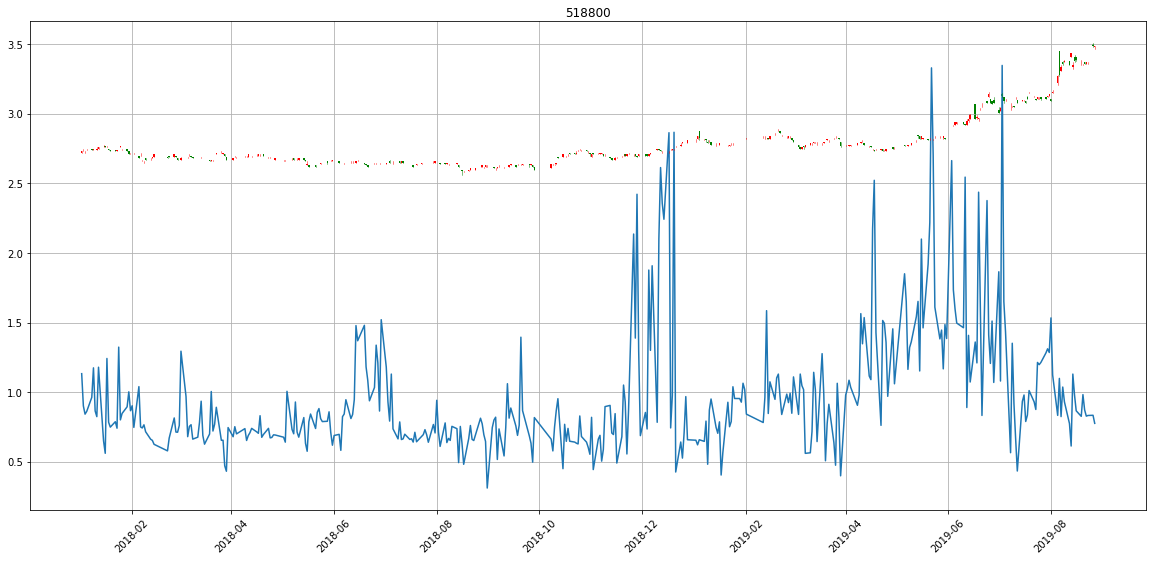

In [30]:
data_list = []
for dates,row in hist_data.iterrows():
    # 将时间转换为数字
    date_time = datetime.datetime.strptime(dates,'%Y-%m-%d')
    t = date2num(date_time)
    open,high,close,low = row[:4]
    datas = (t,open,high,low,close)
    data_list.append(datas)
 
# 创建子图
fig, ax = plt.subplots(figsize=(20,10))
fig.subplots_adjust(bottom=0.2)
# 设置X轴刻度为日期时间
ax.xaxis_date()
plt.xticks(rotation=45)
plt.yticks()
plt.title(stock)
plt.plot(hist_data['volume']*hist_data['close'][-1]/1000000)
mpf.candlestick_ohlc(ax,data_list,width=0.9,colorup='red',colordown='green')
plt.grid()
# mpf.candlestick2_ohlc

In [12]:
# ?ts.get_hist_data
# ?mpf.candlestick_ohlc

In [36]:
# df=ts.get_today_ticks(stock)
# help(ts.get_today_ticks)

In [21]:
gb = hist_data.groupby('p_change')
# gb.mean()

(array([ 3905847.75,  1367653.69,   898923.09,  3322987.38,   423057.47,
         3969465.28,  8012569.04, 14129359.3 , 17975065.93, 16559164.43,
        19687287.52, 12734592.52, 13130535.56,  6739458.  ,  6353882.23,
         2552229.4 ,  2942771.23,  5508785.99,   652194.5 ,  5682092.81]),
 array([-10.02 ,  -9.015,  -8.01 ,  -7.005,  -6.   ,  -4.995,  -3.99 ,
         -2.985,  -1.98 ,  -0.975,   0.03 ,   1.035,   2.04 ,   3.045,
          4.05 ,   5.055,   6.06 ,   7.065,   8.07 ,   9.075,  10.08 ]),
 <a list of 20 Patch objects>)

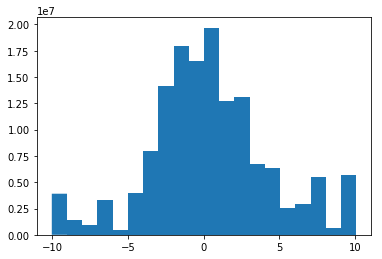

In [22]:
# help(plt.hist)
plt.hist(hist_data['p_change'],bins=20,weights=hist_data['volume'])


In [42]:
df=ts.get_today_ticks(stock)

[Getting data:]###################################################################

In [55]:
df.groupby(df['type']).count()

,time,price,pchange,change,volume,amount
type,,,,,,
0,1,1,1,1,1,1
中性盘,339,339,339,339,339,339
买盘,1984,1984,1984,1984,1984,1984
卖盘,1763,1763,1763,1763,1763,1763
